# 1. Импорты и предобработка изображений

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, random

# Функция для загрузки изображения
def load_image(image_path, max_dim=512):
    img = Image.open(image_path)
    img = img.convert("RGB")  # Убедимся, что изображение в формате RGB
    img = np.array(img)
    img = tf.image.resize(img, (max_dim, max_dim))  # Изменение размера
    img = img / 255.0  # Нормализация в диапазон [0, 1]
    return img

# Функция для случайного выбора изображения из папки
def random_image_from_folder(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    random_image = random.choice(image_files)
    return os.path.join(folder_path, random_image)

# 2. Определение модели для извлечения признаков
Используем VGG19 для извлечения признаков контента и стиля:

In [2]:
# Загрузка VGG-модели для экстракции признаков
def get_vgg_model():
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False
    content_layers = ['block5_conv2']  # Слой для контентного изображения
    style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
    outputs = [vgg.get_layer(name).output for name in content_layers + style_layers]
    return tf.keras.Model([vgg.input], outputs)

# 3. Функция для вычисления потерь

Определим потери контента и потери стиля:

In [3]:
# Функция для вычисления лосса
def compute_loss(model, target_image, content_image, style_image):
    target_outputs = model(target_image)
    content_outputs = model(content_image)
    style_outputs = model(style_image)
    
    # Потеря контента
    content_loss = tf.reduce_mean((content_outputs[0] - target_outputs[0])**2)
    
    # Потеря стиля
    style_loss = 0
    for a, b in zip(style_outputs[1:], target_outputs[1:]):
        gram_a = tf.linalg.einsum('bijc,bijd->bcd', a, a)
        gram_b = tf.linalg.einsum('bijc,bijd->bcd', b, b)
        style_loss += tf.reduce_mean((gram_a - gram_b)**2)
    
    # Общая потеря
    loss = content_loss + 1e-4 * style_loss
    return loss

# 4. Оптимизация и обучение

Теперь определим функцию оптимизации, которая минимизирует потери:

In [4]:
# Шаг оптимизации
@tf.function
def train_step(model, target_image, content_image, style_image, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(model, target_image, content_image, style_image)
    grad = tape.gradient(loss, target_image)
    optimizer.apply_gradients([(grad, target_image)])
    target_image.assign(tf.clip_by_value(target_image, 0.0, 1.0))
    return loss

# 5. Запуск переноса стиля

Теперь соберём всё вместе и запустим перенос стиля:

Контентное изображение: C:/Users/user/Downloads/datasets/impressionist/validation/validation\266284.jpg
Стилевое изображение: C:/Users/user/Downloads/datasets/impressionist/training/training\214348.jpg


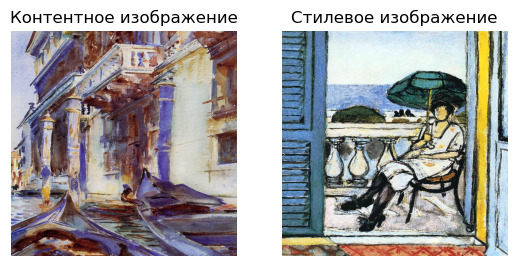

Epoch 1/100, Loss: 7339993.5000
Epoch 2/100, Loss: 3637816.7500
Epoch 3/100, Loss: 2322658.7500
Epoch 4/100, Loss: 2018053.1250
Epoch 5/100, Loss: 1677860.3750
Epoch 6/100, Loss: 1407569.5000
Epoch 7/100, Loss: 1166854.1250
Epoch 8/100, Loss: 965847.6875
Epoch 9/100, Loss: 829257.6250
Epoch 10/100, Loss: 709797.3125


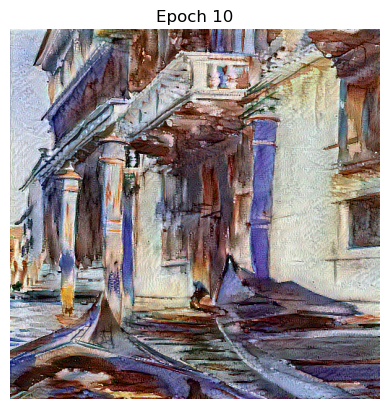

Epoch 11/100, Loss: 641126.5625
Epoch 12/100, Loss: 595295.7500
Epoch 13/100, Loss: 548115.6875
Epoch 14/100, Loss: 516561.3125
Epoch 15/100, Loss: 482420.0312
Epoch 16/100, Loss: 447107.5938
Epoch 17/100, Loss: 424576.0000
Epoch 18/100, Loss: 398055.6875
Epoch 19/100, Loss: 370766.0625
Epoch 20/100, Loss: 352470.5938


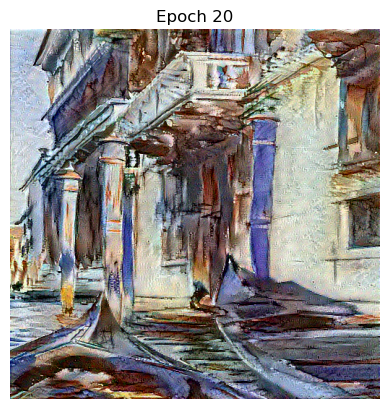

Epoch 21/100, Loss: 333096.7500
Epoch 22/100, Loss: 313940.2188
Epoch 23/100, Loss: 296546.0000
Epoch 24/100, Loss: 278223.9688
Epoch 25/100, Loss: 262072.1562
Epoch 26/100, Loss: 246474.5000
Epoch 27/100, Loss: 232296.6094
Epoch 28/100, Loss: 221429.6094
Epoch 29/100, Loss: 209255.2969
Epoch 30/100, Loss: 197813.3906


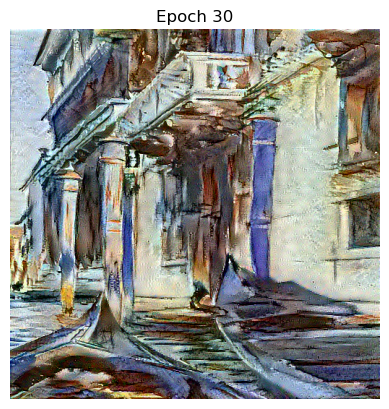

Epoch 31/100, Loss: 189026.5625
Epoch 32/100, Loss: 180217.9375
Epoch 33/100, Loss: 172362.0938
Epoch 34/100, Loss: 165647.2969
Epoch 35/100, Loss: 159599.3906
Epoch 36/100, Loss: 154003.3906
Epoch 37/100, Loss: 148507.6719
Epoch 38/100, Loss: 143986.4375
Epoch 39/100, Loss: 139549.6562
Epoch 40/100, Loss: 135217.9219


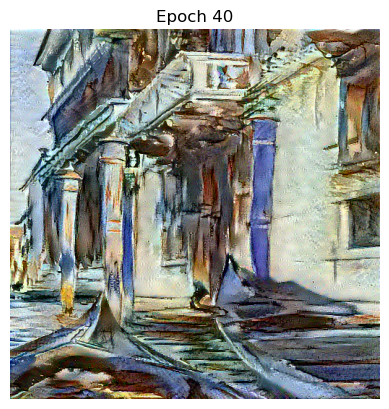

Epoch 41/100, Loss: 131500.1250
Epoch 42/100, Loss: 127720.8906
Epoch 43/100, Loss: 124566.2188
Epoch 44/100, Loss: 121496.1094
Epoch 45/100, Loss: 118405.9922
Epoch 46/100, Loss: 115699.9609
Epoch 47/100, Loss: 112886.0234
Epoch 48/100, Loss: 110302.8906
Epoch 49/100, Loss: 107819.9141
Epoch 50/100, Loss: 105492.3516


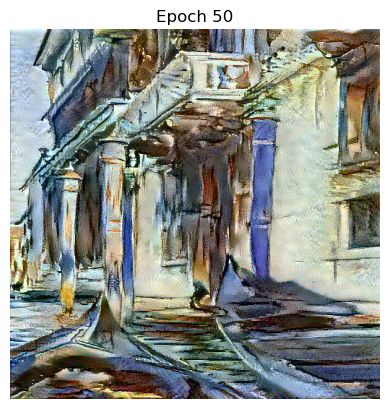

Epoch 51/100, Loss: 103188.4297
Epoch 52/100, Loss: 100951.1406
Epoch 53/100, Loss: 98952.2969
Epoch 54/100, Loss: 96871.7500
Epoch 55/100, Loss: 94946.5000
Epoch 56/100, Loss: 93124.7734
Epoch 57/100, Loss: 91397.0547
Epoch 58/100, Loss: 89713.2188
Epoch 59/100, Loss: 88138.2891
Epoch 60/100, Loss: 86608.6562


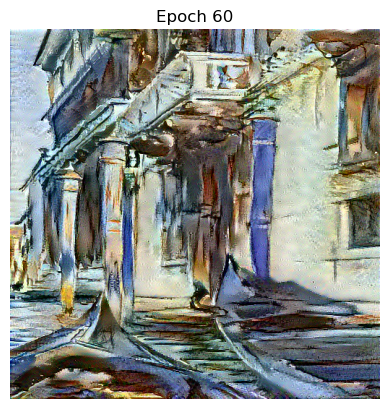

Epoch 61/100, Loss: 85122.9688
Epoch 62/100, Loss: 83767.4766
Epoch 63/100, Loss: 82406.9219
Epoch 64/100, Loss: 81142.9062
Epoch 65/100, Loss: 79906.8516
Epoch 66/100, Loss: 78737.7344
Epoch 67/100, Loss: 77600.4766
Epoch 68/100, Loss: 76496.5078
Epoch 69/100, Loss: 75430.3047
Epoch 70/100, Loss: 74420.2188


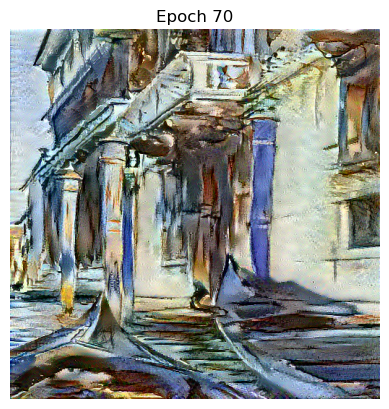

Epoch 71/100, Loss: 73426.4062
Epoch 72/100, Loss: 72478.1094
Epoch 73/100, Loss: 71555.3438
Epoch 74/100, Loss: 70647.2109
Epoch 75/100, Loss: 69779.9531
Epoch 76/100, Loss: 68932.4688
Epoch 77/100, Loss: 68109.3438
Epoch 78/100, Loss: 67306.7656
Epoch 79/100, Loss: 66529.5078
Epoch 80/100, Loss: 65766.9062


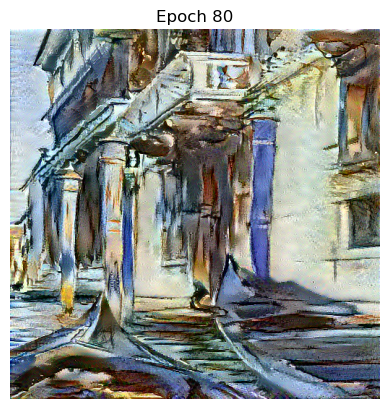

Epoch 81/100, Loss: 65029.8164
Epoch 82/100, Loss: 64303.7930
Epoch 83/100, Loss: 63599.6367
Epoch 84/100, Loss: 62911.5820
Epoch 85/100, Loss: 62241.6602
Epoch 86/100, Loss: 61584.1367
Epoch 87/100, Loss: 60942.2109
Epoch 88/100, Loss: 60314.6289
Epoch 89/100, Loss: 59701.8164
Epoch 90/100, Loss: 59100.0469


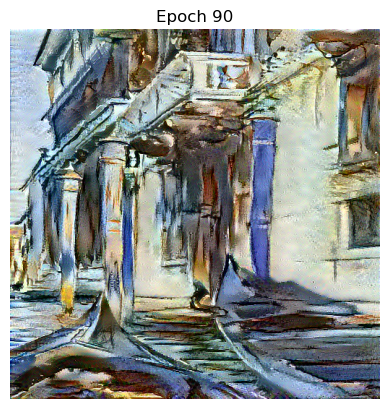

Epoch 91/100, Loss: 58513.5859
Epoch 92/100, Loss: 57936.6055
Epoch 93/100, Loss: 57372.8164
Epoch 94/100, Loss: 56820.3125
Epoch 95/100, Loss: 56277.9180
Epoch 96/100, Loss: 55747.4922
Epoch 97/100, Loss: 55226.1641
Epoch 98/100, Loss: 54715.1562
Epoch 99/100, Loss: 54212.9570
Epoch 100/100, Loss: 53720.5703


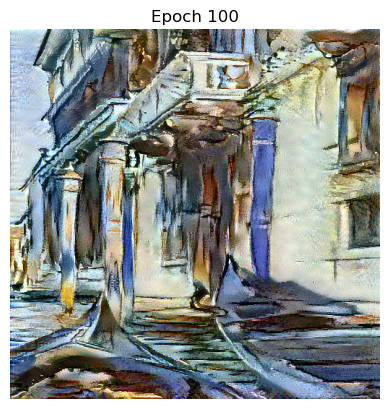

Результат сохранён в output_stylized_image.jpg


In [6]:
# Пути к папкам с изображениями
content_folder = 'C:/Users/user/Downloads/datasets/impressionist/validation/validation'
style_folder = 'C:/Users/user/Downloads/datasets/impressionist/training/training'

# Случайный выбор изображений
content_image_path = random_image_from_folder(content_folder)
style_image_path = random_image_from_folder(style_folder)

print("Контентное изображение:", content_image_path)
print("Стилевое изображение:", style_image_path)

# Загрузка изображений
content_image = load_image(content_image_path)
style_image = load_image(style_image_path)

# Визуализация выбранных изображений
plt.subplot(1, 2, 1)
plt.imshow(content_image)
plt.title("Контентное изображение")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(style_image)
plt.title("Стилевое изображение")
plt.axis("off")
plt.show()

# Создание модели
vgg_model = get_vgg_model()

# Оптимизируемое изображение (копия контентного изображения)
target_image = tf.Variable(content_image[tf.newaxis, ...], dtype=tf.float32)

# Оптимизатор
optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

# Обучение
epochs = 100
for epoch in range(epochs):
    loss = train_step(vgg_model, target_image, content_image[tf.newaxis, ...], style_image[tf.newaxis, ...], optimizer)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')
    
    if (epoch + 1) % 10 == 0:  # Визуализация каждые 10 эпох
        plt.imshow(target_image.numpy()[0])
        plt.title(f'Epoch {epoch+1}')
        plt.axis('off')
        plt.show()

# Сохранение результата
output_image = target_image.numpy()[0]
output_image = np.clip(output_image, 0.0, 1.0)  # Ограничение значений пикселей
output_image = Image.fromarray((output_image * 255).astype(np.uint8))
output_image.save('output_stylized_image.jpg')
print("Результат сохранён в output_stylized_image.jpg")

# 6. Визуализация результата

Если ещё не проверили результат:

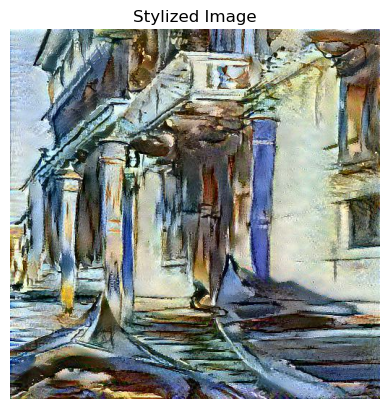

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Загрузка изображения для отображения
output_image = tf.io.read_file('output_stylized_image.jpg')
output_image = tf.image.decode_image(output_image)
plt.imshow(output_image)
plt.axis('off')
plt.title("Stylized Image")
plt.show()